<a href="https://colab.research.google.com/github/NilSagor/mc_learn_python/blob/master/link_pred_community.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import sys
import numpy as np
import networkx as nx
from networkx.algorithms import community
import itertools
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [ ]:
from google.colab import files
files.upload()

!gunzip -q email-Eu-core-temporal.txt.gz
!pip install --upgrade seaborn

Saving email-Eu-core-temporal.txt.gz to email-Eu-core-temporal.txt.gz
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
FileName = 'email-Eu-core-temporal.txt'
Graphtype = nx.Graph()
G = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight', int),))

get_nodes = False
if get_nodes == True:
  for x in G.nodes():
    print("Node: ", x, "has total degree ", G.degree(x), " , In_degree: ", G.out_degree(x), " and out_degree: ", G.in_degree(x))



In [ ]:
get_edges = False
if get_edges == True:
  for u,v in G.edges():
    print("Weight of edges ("+str(u) + "," + str(v) + ")", G.get_edge_data(u,v))

In [ ]:
get_communities = False
if get_communities == True:
  find_communities = community.girvan_newman(G)
  top_level_communities = next(find_communities)
  next_level_communities = next(find_communities)
  print(sorted(map(sorted, next_level_communities)))

In [ ]:
c = list(community.k_clique_communities(G,13))
print(c)

[frozenset({256, 2, 260, 517, 133, 648, 266, 782, 912, 790, 30, 416, 166, 294, 168, 425, 946, 435, 948, 949, 52, 439, 313, 699, 573, 61, 447, 586, 74, 332, 77, 974, 721, 214, 984, 472, 90, 602, 730, 607, 356, 868, 743, 232, 104, 111, 112, 500, 885, 759, 762, 765, 126}), frozenset({647, 136, 267, 142, 17, 915, 31, 543, 165, 806, 428, 302, 952, 953, 316, 838, 200, 971, 847, 344, 857, 92, 349, 990, 351, 224, 629}), frozenset({207, 656, 978, 851, 274, 469, 658, 280, 24, 795, 988, 547, 35, 421, 614, 167, 424, 552, 301, 817, 630, 954, 188, 957}), frozenset({704, 73, 458, 844, 723, 918, 216, 25, 672, 41, 684, 558, 48, 499, 565, 758, 956, 318, 319}), frozenset({0, 710, 333, 78, 976, 470, 599, 409, 538, 605, 862, 991, 929, 99, 228, 569, 178, 693, 502, 249, 314, 767}), frozenset({644, 516, 650, 13, 654, 14, 783, 270, 657, 532, 921, 923, 924, 541, 682, 173, 437, 828, 702, 576, 837, 199, 327, 719, 850, 979, 90, 738, 996, 1001, 745, 881, 761, 506, 381}), frozenset({838, 267, 526, 846, 530, 658, 280

In [ ]:
for x in sorted(c, key=len):
  print(len(x))

14
15
18
19
22
24
27
35
53
116


281


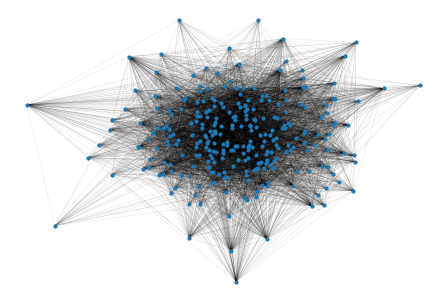

In [ ]:
k = nx.induced_subgraph(G, c[0].union(c[1]).union(c[2]).union(c[3]).union(c[4]).union(c[5]).union(c[6].union(c[7]).union(c[8]).union(c[9])))
print(len(k.nodes()))
nx.draw_kamada_kawai(k, node_size = 10, arrowsize = 4, width = 0.05)
plt.draw()
plt.savefig('K1.png', dpi=800)

In [ ]:
def community_layout(g, partition):
  pos_communities = _position_communities(g, partition, scale = 3.)
  pos_nodes = _position_nodes(g, partition, scale = 1.)
  pos = dict()
  for node in g.nodes():
    pos[node] = pos_communities[node] + pos_nodes[node]
  return pos

  

In [ ]:
def _position_communities(g, partition, **kwargs):
  between_community_edges = _find_between_community_edges(g, partition)
  communities = set(partition.values())
  hypergraph = nx.DiGraph()
  hypergraph.add_nodes_from(communities)
  for (ci, cj), edges in between_community_edges.items():
    hypergraph.add_edge(ci, cj, weight = len(edges))
  pos_communities = nx.spring_layout(hypergraph, **kwargs)
  pos = dict()
  for node, community in partition.items():
    pos[node] = pos_communities[community]
  return pos

In [ ]:
def _find_between_community_edges(g, partition):
  edges = dict()
  for (ni, nj) in g.edges():
    ci = partition[ni]
    cj = partition[nj]

  if ci != cj:
    try:
      edges[(ci,cj)] += [(ni, nj)]
    except KeyError:
      edges[(ci, cj)] = [(ni, nj)]

  return edges

In [ ]:
def _position_nodes(g, partition, **kwargs):
  communities = dict()
  for node, community in partition.items():
    try:
      communities[community] += [node]
    except KeyError:
      communities[community] = [node]
  pos = dict()
  for ci, nodes in communities.items():
    subgraph = g.subgraph(nodes)
    pos_subgraph = nx.spring_layout(subgraph, **kwargs)
    pos.update(pos_subgraph)

  return pos

In [ ]:
d = c

number of communities: 10


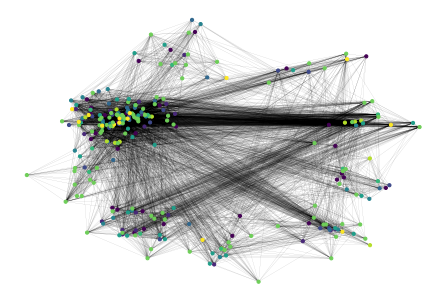

In [ ]:
index = 0
partition = {}
for x in d:
  for y in x:
    partition[y] = index
  index = index+1
pos = community_layout(k, partition)
print("number of communities: " + str(max(list(partition.values()))+ 1))
nx.draw(k, pos, node_color = list(partition.values()), node_size = 10, arrowsize = 4, width = 0.05)
plt.savefig('k1-2', dpi=800)

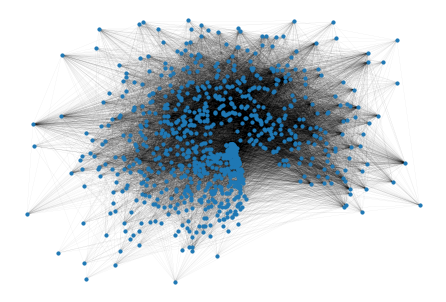

In [ ]:
nx.draw_kamada_kawai(G, node_size = 10, arrowsize = 4, width = 0.02)
plt.draw()
plt.savefig('G.png', dpi= 1000)

number of communities: 8


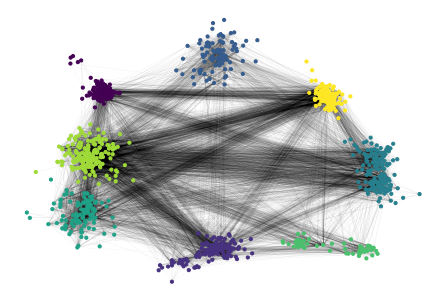

In [ ]:
import community
partition = community.best_partition(G)
pos = community_layout(G, partition)
print("number of communities: "+ str(max(list(partition.values()))+1))
nx.draw(G, pos, node_color=list(partition.values()), node_size=10, arrowsize = 4, width = 0.02)
plt.savefig("G.png", dpi=1000)

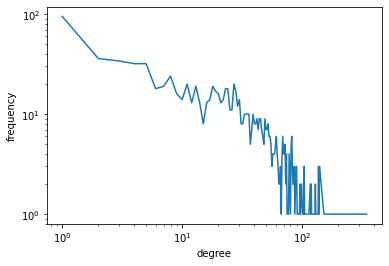

In [ ]:
g = nx.degree_histogram(G)
X = range(len(g))
X = list(filter(lambda a: g[a] != 0, X))
Y = list(filter(lambda a: a!=0, g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree.png', dpi=800)

In [ ]:
max(dict(nx.degree(G)).values())

345

In [ ]:
sum(dict(nx.degree(G)).values())/len(dict(nx.degree(G)).values())

32.5841784989858

In [ ]:
nx.degree_assortativity_coefficient(G)

-0.02574336808308864

In [ ]:
nx.average_clustering(G)

0.40705044751953817

In [ ]:
nx.graph_clique_number(G)

18

In [ ]:
nx.average_shortest_path_length(G)

2.586933824816466

In [ ]:
nx.number_of_nodes(G)

986

In [ ]:
len(list(nx.bridges(G)))

95

In [ ]:
max(nx.core_number(G).values())

34

In [ ]:
sum(nx.triangles(G).values())/3

105461.0

In [76]:
nx.closeness_centrality(G)



{0: 0.35978211553961364,
 1: 0.2839442256250395,
 2: 0.41548608606942633,
 3: 0.26629410095532363,
 4: 0.36206644643192865,
 5: 0.369296051676387,
 6: 0.3572779187817259,
 7: 0.2797651609796996,
 8: 0.34575282462747664,
 9: 0.26182198628279146,
 10: 0.26973022615543757,
 11: 0.30467746382740213,
 12: 0.2964928872427839,
 13: 0.3580876942733361,
 14: 0.35146665832375207,
 15: 0.32477721108511876,
 16: 0.3696950749629093,
 17: 0.3114727281549136,
 18: 0.24535876075881866,
 19: 0.32757567436876267,
 20: 0.2452533443192398,
 21: 0.2716727144795698,
 22: 0.2526044975106479,
 23: 0.0,
 24: 0.37890674626597187,
 25: 0.3271059195776029,
 26: 0.28885841441804355,
 27: 0.2616222746227741,
 28: 0.2994772795432583,
 29: 0.35200904514215287,
 30: 0.35529884930235994,
 31: 0.36264206876329896,
 32: 0.39103176214648294,
 33: 0.0,
 34: 0.2857225819441942,
 35: 0.3243154425385522,
 36: 0.2867782625672716,
 37: 0.2776087560877668,
 38: 0.37393747746248374,
 39: 0.30858011878583613,
 40: 0.37619878161426

In [74]:
nx.eigenvector_centrality(G)

{0: 0.028372939150517206,
 1: 0.004087689479754912,
 2: 0.0800876501608252,
 3: 0.001281277054973425,
 4: 0.026036128510151062,
 5: 0.038873249118879204,
 6: 0.03607490641532038,
 7: 0.0018856219574339785,
 8: 0.02547240049524977,
 9: 0.0010118264559467616,
 10: 0.0017640260051896813,
 11: 0.00711972019543743,
 12: 0.004907772153508585,
 13: 0.029300785943769978,
 14: 0.025513143889739447,
 15: 0.008683764738788048,
 16: 0.03604718255967736,
 17: 0.010187014406644657,
 18: 0.00035204537710477416,
 19: 0.014553893319026555,
 20: 0.0004479049735171777,
 21: 0.0017781616365140109,
 22: 0.000509078084617497,
 23: 9.140662305637716e-22,
 24: 0.0588589937377771,
 25: 0.013116535610589914,
 26: 0.005189814555543886,
 27: 0.0013484440308688115,
 28: 0.007918549654377422,
 29: 0.025252199848441056,
 30: 0.03698166082611393,
 31: 0.03292186117009449,
 32: 0.06864314318827641,
 33: 9.140662305637716e-22,
 34: 0.003674513200515682,
 35: 0.020923747275239574,
 36: 0.0022044565782364978,
 37: 0.0054

Link Prediction

In [ ]:
# directed graph
FileName = "email-Eu-core-temporal.txt"
Graphtype = nx.DiGraph() 
G = nx.read_edgelist(FileName, create_using = Graphtype, nodetype = int, data = (('weight', float),))

get_nodes = False
if get_nodes == True:
  for x in G.nodes():
    print(1)

get_edges = False
if get_edges == True:
  for u, v in G.edges():
    print(1)

In [ ]:
import pandas as pd
import sys

df = pd.read_csv(FileName, sep=" ", header = None)
df.columns = ["start_node", "end_node", "time_stamp"]

In [ ]:
def train_test_split(df, percentage_of_train):
  mean = np.percentile(df["time_stamp"], percentage_of_train)
  location = (df['time_stamp']< mean)
  sub_df = df.loc[location]
  location_test = (df["time_stamp"]> mean)
  sub_test = df.loc[location_test]
  sub_test.drop_duplicates(subset=["start_node", "end_node"], inplace = True)
  G_sub = nx.from_pandas_edgelist(sub_df, "start_node", "end_node", ["time_stamp"])
  G_sub_undirected = G_sub.to_undirected()
  return [G_sub_undirected, sub_test]

In [ ]:
def link_prediction(G_sub_undirected):
  preds = nx.preferential_attachment(G_sub_undirected, ebunch = None)
  PA = []
  for u, v, p in preds:
    PA.append([u,v,p])

  preds_1 = nx.resource_allocation_index(G_sub_undirected, ebunch = None)
  RA = []
  for u, v, p in preds_1:
    RA.append([u,v,p])

  preds_2 = nx.adamic_adar_index(G_sub_undirected, ebunch = None)
  AAI = []
  for u, v, p in preds_2:
    AAI.append([u,v,p])

  preds_3 = nx.jaccard_coefficient(G_sub_undirected, ebunch=None)
  JC = []
  for u, v, p in preds_3:
    JC.append([u,v,p])

  return [PA, RA, AAI, JC]

In [ ]:
def evaluation(link_list, sub_test, perentile):
  i = 0
  while i<4:
    df_result = pd.DataFrame(link_list[i])
    df_result.columns = ["start_node", "end_node", 'score']
    df_result = df_result.drop(df_result[df_result.score == 0].index)
    threshold = np.percentile(df_result["score"], percentile)
    if i == 0:
      print("Preferential Attachment: ")
    if i == 1:
      print("Resource Allocation Index: ")
    if i== 2:
      print("Adamic-adar Index: ")
    if i== 3:
      print("Jaccard_coefficient: ")
    
    print("Current Threshold Percentile= ", percentile)
    print("Current Threshold value = ", threshold)
    link_location = (df_result['score'] > threshold)
    df_link = df_result.loc[link_location]
    number_edge_in_test = sub_test.shape[0]
    number_edge_in_prediction = df_link.shape[0]
    df_merged = pd.merged(df_link, sub_test, how = 'inner', on = ['start_node', 'end_node'])
    df_merged.drop_duplicates(subset=['start_node', 'end_node'], inplace = True)
    number_edge_in_both = df_merged.shape[0]
    if number_edge_in_prediction == 0:
      print("No links predicted")
      print("--------------------------------------------------------")
      i = i+1
    else:
      print("number_edge_in_test, number_edge_in_prediction, number_edge_in_both are: ")
      print(number_edge_in_test, number_edge_in_prediction, number_edge_in_both)
      print("False Positive Rate: ", (number_edge_in_prediction - number_edge_in_both)/number_edge_in_prediction)
      print("False Negative Rate: ", (number_edge_in_test - number_edge_in_both)/number_edge_in_test)
      print("Accuracy: ", number_edge_in_both/number_edge_in_test)
      print("----------------------------------------")
      i = i +1


In [ ]:
def evaluation_data(link_list, sub_test, percentile, k):
  PA_stat = []
  RAI_stat = []
  AAI_stat = []
  JC_stat = []
  i = 0
  tracker = 0
  split = 5
  while i < 5:
    df_result = pd.DataFrame(link_list[i-1])
    df_result.columns = ['start_node', 'end_node', 'score']
    df_result = df_result.drop(df_result[df_result.score == 0].index)
    threshold = np.percentile(df_result["score"], percentile)
    link_location = (df_result['score'] > threshold)
    df_link = df_result.loc[link_location]
    number_edge_in_test = sub_test.shape[0]
    number_edge_in_prediction = df_link.shape[0]
    df_merged = pd.merge(df_link, sub_test, how = 'inner', on=["start_node", "end_node"])
    df_merged.drop_duplicates(subset = ['start_node', 'end_node'], inplace = True)
    number_edge_in_both = df_merged.shape[0]
    if number_edge_in_prediction == 0:
      print("No links predicted")
      print("-------------------------------------------")
      i += 1
    else:
      i += 1
      if i==1:
        PA_stat.append([i, k*0.1, percentile, number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])

      if i==2:
        RAI_stat.append([i, k*0.1, percentile, number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])

      if i==3:
        AAI_stat.append([i, k*0.1, percentile, number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])

      if i==4:
        JC_stat.append([i, k*0.1, percentile, number_edge_in_both/number_edge_in_test, number_edge_in_both/number_edge_in_prediction])

    return PA_stat, RAI_stat, AAI_stat, JC_stat




In [ ]:
result_data = []
for x in range(5,9):
  print('current training size is: ', x*10)
  DF = train_test_split(df, x*0.1)
  result = link_prediction(DF[0])
  for y in range(0, 9):
    result_data.append(evaluation_data(result, DF[1], y*10, x))

current training size is:  50
current training size is:  60
current training size is:  70
current training size is:  80


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

PA = []
for i in range(0,36):
  PA.append(result_data[i][0][0])
headers = ["0", "Training", "Threshold", "Accuracy", "Positive Rate"]
PA = pd.DataFrame(PA, columns = headers)
PA.drop(['0'], axis = 1)

,Training,Threshold,Accuracy,Positive Rate
0,0.5,0,0.071466,0.360812
1,0.5,10,0.064307,0.361111
2,0.5,20,0.056183,0.358481
3,0.5,30,0.048703,0.361385
4,0.5,40,0.040700,0.367332
5,0.5,50,0.034748,0.368443
6,0.5,60,0.028353,0.378422
7,0.5,70,0.021597,0.394563
8,0.5,80,0.012186,0.385006
9,0.6,0,0.078812,0.344840


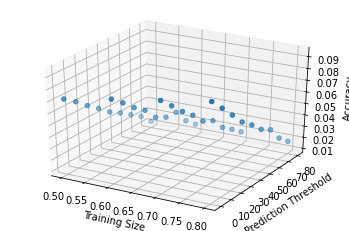

<Figure size 432x288 with 0 Axes>

In [ ]:
threeD = plt.figure().gca(projection = '3d')
threeD.scatter(PA['Training'], PA['Threshold'], PA['Accuracy'])
threeD.set_xlabel('Training Size')
threeD.set_ylabel('Prediction Threshold')
threeD.set_zlabel('Accuracy')
plt.show()
plt.savefig('temp.png', figsize = (450, 400))